# Tehtävä 2-1. 
### Aihe: Neuroverkko käsin  (max. 4 p)

In [1]:
# Kirjoita tähän tietosi!
student_name = 'Jere Soininen'
student_id = 'AB6802'

Luo tässä tehtävässä **oma neuroverkko** käyttämällä vain **Core Python 3.x**- ja *NumPy*-kirjastoa.

Tehtävässä on määritelty koordinaattiparit, joilla piirretään kaksivärisiä pisteitä (punainen ja sininen).
Lopullisena tavoitteena on luoda neuroverkko, joka osaa sijoittaa pisteen koordinaattijärjestelmän punaisille tai sinisille alueille.

Kun kaavioon piirretään uusi piste ja pisteen koordinaatit syötetään neuroverkkoon, se ennustaa pisteen värin ja todennäköisyyden.

Tehtävän tarkoitus: ymmärtää paremmin neuroverkkoalgoritmin toimintaa.

Tehtävän vaiheet ovat:

1. Luo opetusdatan koordinaattipisteet sekä värit ominaisuuksiin ja ennustettaviin arvoihin.
2. Luo neuroverkkoluokka, jonka rakenne on:
    * Sisääntulokerros, jossa on kaksi neuronia `(x, y)` - eli koordinaattipari pisteelle.
    * Yksi piilotettua kerros, jossa on **6** neuronia ja aktivointifunktiona `sigmoid`.
    * Ulostulokerros, jossa yksi neuroni ja aktivointifunktiona `sigmoid`.
    * Ulostulokerroksen tulos on numeerinen arvo (`float`) väliltä `[0, 1]`.
3. Luo funktiot, joiden avulla lasket neuroverkon ennustuksen syöttödatalle (*forwardpropagation*) ja päivitä yhteyksien painoarvoja virheen avulla (*backpropagation*).
4. Syötä koulutusdata 1000 kertaa neuroverkon läpi.
    * Syötä jokaisella kierroksella koulutusdata rivi riviltä neuroverkon läpi ja päivitä painoarvot.
    * Tallenna kierroksen aikana virheet jokaiselle syötölle, ja lisää kierroksen virheistä keskiarvo listaan. Piirrä kuvaaja siitä, kuinka virhe muuttuu koulutuksen aikana.
5. Ennusta neuroverkolla (`float`-arvo), minkä värinen on piste: `[0.5, 8.7]`. Kuinka tarkka ennuste mielestäsi on?
6. Ennusta neuroverkolla (`float`-arvo), minkä värinen on piste: `[15, -15]`. Kuinka tarkka ennuste mielestäsi on?
7. Tutki miten `backpropagation()`-metodin `learning_rate`-argumentin muutos vaikuttaa (`0.01 -- 0.001`) tulokseen?
8. Tutki miten `make_blobs()`-funktion `n_samples`-ominaisuuden muuttaminen vaikuttaa tulokseen?
9. Tutki miten `make_blobs()`-funktion `cluster_std`-ominaisuuden muuttaminen vaikuttaa tulokseen?


Vinkkejä:
* Piirrä neuroverkon rakenne piirrustusohjelmalla tai paperille, näet silloin yhteyksien määrän jokaisessa kerroksessa.
* Käytä olemassa olevaa ratkaisua materiaaleista, lisää siihen tarvittavat laskut jokaiselle kerrokselle.

Kun virhetoiminto (häviö) on määritetty, gradient descent -menetelmää käytetään sen minimoimiseen.
Siinä lasketaan virhefunktion gradientti suhteessa painotuskertoimiin ja se liikkuu askel askeleelta vastakkaiseen suuntaan gradientin suhteen, kunnes optimi löytyy.

### Mitä sinun tulee toteuttaa tässä tehtävässä?

* `class NeuralNetwork` - käyttövalmis luokka, eli muutoksia ei tarvita
* `train_neural_network()` - käyttövalmis, kouluttaa neuroverkkoa ja säästää häviön jokaisen kierroksen jälkeen
* `create_dots_and_labels()` - vaatii myös omaa toteutuskoodia
* piirtää neuroverkon häviöt (*losses*)
* laskea neuroverkon ennusteen syötteelle `[x, y]` annetussa muuttujassa.

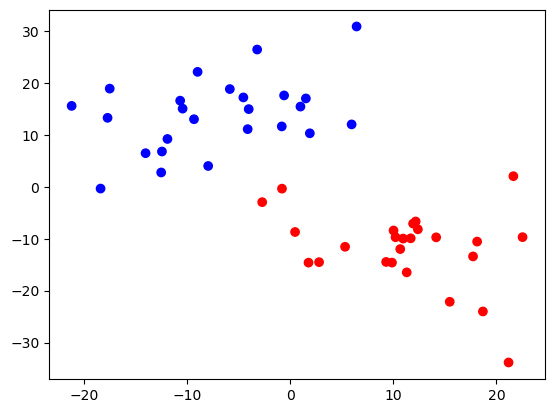

In [2]:
# tehtävässä käytetään make_blobs()-funktiota, jota voi käyttää testidatasetin piirtoon
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
dots, labels = make_blobs(n_samples=50, centers=2, cluster_std=8, center_box=(-20, 20), random_state=151)
colors = ['red' if label == 0 else 'blue' for label in labels]
plt.scatter(dots[:,0],dots[:,1],color=colors)

In [3]:
import numpy as np

# Tehtävän toteutus - tämä on valmis luokka käytettäväksi
class NeuralNetwork:
    def __init__(self):
        self.weights1 = np.random.rand(2, 6)
        self.weights2 = np.random.rand(6, 1)

    def __init__(self, input_neurons, hidden_neurons):
        self.weights1 = np.random.rand(input_neurons, hidden_neurons)
        self.weights2 = np.random.rand(hidden_neurons, 1)

    # Virhefunktio
    def loss_function(self, true, prediction):
        return 0.5 * (true - prediction) ** 2

    # Virhefunktion derivaatta
    def loss_function_derivative(self, true, prediction):
        return true - prediction

    # Sigmoid funktio
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # Sigmoidin derivaatta
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    # Neuroverkon läpikäynti
    def forwardpropagation(self, X, y):
        self.X = X
        self.y = y
        self.layer1 = self.sigmoid(np.dot(self.X, self.weights1))
        self.output = self.sigmoid(np.dot(self.layer1, self.weights2))

        # lasketaan häviö eli neuroverkon ennustuksen etäisyys oikeasta arvosta
        self.loss = self.loss_function(self.y, self.output)

    # Painoarvojen päivitys backpropagation - menetelmällä
    def backpropagation(self, learning_rate):
        output_error = self.loss_function_derivative(self.y, self.output)
        output_delta = output_error * self.sigmoid_derivative(self.output)
        weights2_adjustment = np.dot(self.layer1.T, output_delta)

        layer1_error = np.dot(output_delta, self.weights2.T)
        layer1_delta = layer1_error * self.sigmoid_derivative(self.layer1)
        weights1_adjustment = np.dot(self.X.T, layer1_delta)

        self.weights1 += learning_rate * weights1_adjustment
        self.weights2 += learning_rate * weights2_adjustment


 `create_dots_and_labels()`: luodaan pisteet ja nimekkeet sekä nimikkeiden pohjalta asetetaan RGB-väri pisteelle.
 * toteuta seuraava: Luo väritaulukko, jossa väri on `[label: 0: "red" tai 1: "blue"]`
 * Selvitä miten `make_blobs()` toimii

 `train_neural_network()`: Kouluttaa neuroverkon ja tallentaa häviön joka epoch-kierroksen jälkeen (valmis toteutus)

ks. alla olevasta koodilohkosta **TODO** -kohdat, jotka vaativat oman koodin kirjoittamista.

In [4]:
# funktio palauttaa taulukon, jossa on [dots, labels, colors]
def create_dots_and_labels():
    # TODO: Tutki miten make_blobs()-funktion cluster_std-ominaisuuden kasvattaminen vaikuttaa tulokseen?
    dots, labels = make_blobs(n_samples=50, centers=2, cluster_std=8, center_box=(-20, 20), random_state=151)
    # TODO: luo colors-väritaulukko labels-taulukon arvojen pohjalta. väritaulukossa väri on ["red" tai "blue"]
    # värit saa ylempänä?
    colors = []
    return [dots, labels, colors]

# Funktio kouluttaa neuroverkon ja tallentaa häviön joka epoch-kierroksen jälkeen (valmis toteutus, mutta learning rate arvoa voi muuttaa)
def train_neural_network(ntwrk, train_X, train_y):
    losses_arr = []  # tallentaa kierroksen virheet
    epochs = 1000
    for epoch in range(epochs):
        batch_losses = []
        # Käydään jokaisessa kierroksessa jokainen koordinaattipari läpi
        for X, y in zip(train_X, train_y):
            ntwrk.forwardpropagation(np.array([X]), np.array([y]))
            # TODO: Tutki Miten learning_rate-muuttujan muutos (0.01 - 0.001) vaikuttaa tulokseen?
            ntwrk.backpropagation(learning_rate=0.01)
            batch_losses.append(ntwrk.loss[0])
        losses_arr.append(np.average(batch_losses))  # lasketaan keskiarvo yhden kierroksen virhearvoista
    return losses_arr


* Määritetään koulutusdata ja luodaan neuroverkko
    * `create_dots_and_labels()`
* Piirretään pisteet (kuviotyyppinä `scatter plot`)
* Koulutetaan neuroverkkoa  ja otetaan joka kierroksen jälkeen neuroverkon häviö ylös

In [5]:
# Tehtävän toteutus jatkuu tästä

# TODO: Luodaan ja koulututaan neuroverkko
# ... NeuralNetwork(sisaantulokerroksen_neuronit, piilokerroksen_neuronit) # ks. ohjeen kohta 2.
# ... train_neural_network(...)

# TODO: Luodaan ja koulututaan neuroverkko ja otetaan joka kierroksen jälkeen neuroverkon häviö ylös
input_neurons = 2
hidden_neurons = 6
ntwrk = NeuralNetwork(input_neurons, hidden_neurons)


epoch_losses = train_neural_network(ntwrk, dots, labels)
print(ntwrk.loss[0])

[0.00058207]


Piirretään neuroverkon häviöt

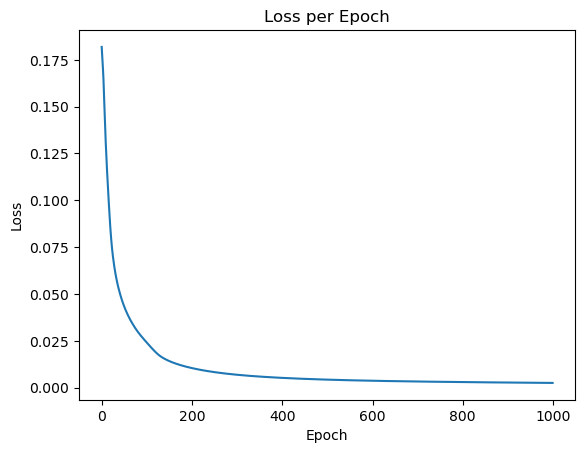

In [6]:
# TODO: Piirretään neuroverkon häviöt
import matplotlib.pyplot as plt
plt.plot(epoch_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.show()

### Lasketaan ennusteet
* laske `output1`-muuttujaan neuroverkon ennuste syötteelle `[0.5, 8.7]`.
* laske `output2`-muuttujaan neuroverkon ennuste syötteelle `[-30, -30]`.


In [7]:
# Tehtävän toteutus

# TODO: Ennusteiden laskeminen yo. kahdelle pisteille

# TODO: Lasketaan ennuste ensimmäiselle syötteelle
test_X_nn = np.array([0.5, 8.7])
layer1_output = ntwrk.sigmoid(np.dot(test_X_nn, ntwrk.weights1))  # Ensimmäinen kerros, painojen käyttö
output1 = ntwrk.sigmoid(np.dot(layer1_output, ntwrk.weights2))[0]  # Lopullinen ennuste

# Annetaan edellisen kerroksen tulokset ja toiset painoarvot edellä käytetylle funktiolle
#output1 = [0.9]  # TODO: Alustettu ettei tule virheitä. Arvo on laskettava ja sijoitettava tähän muuttujaan.

# TODO: Lasketaan ennuste toiselle syötteelle
test_X_nn2 = np.array([15, -15])
layer1_output2 = ntwrk.sigmoid(np.dot(test_X_nn2, ntwrk.weights1))  # Ensimmäinen kerros, painojen käyttö
output2 = ntwrk.sigmoid(np.dot(layer1_output2, ntwrk.weights2))[0]  # Lopullinen ennuste

#output2 = [0.1]   # TODO: Alustettu ettei tule virheitä. Arvo on laskettava ja sijoitettava tähän muuttujaan.


In [8]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.
print(output1)
print(output2)

0.9495528153513716
0.025803137483253316


# Tehtävä 2-2
### Aihe: Yksinkertainen neuroverkko Keras Sequential API:lla (max. 3 p)

Koulutetaan yksinkertainen neuroverkko **Keras**-rajapinnalla käyttäen `titanic-dataa`
Datan saat osoitteesta: `https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/titanic.csv`

Tehtävästä on löydyttävä vaiheet:
1. Valitse Titanic-datasta vain kolme-neljä tärkeää feature-piirrettä tehtävään
   * tästä aineistosta on ollut esimerkkejä jo koneoppimisen puolella (ja niitä voi lainata tai soveltaa), mutta tätä voi halutessaan myös itse tutkia tarkemmin
2. Luo neuroverkko (käytä `tf.keras.Sequential()`-metodia)
3. Määritä häviöfunktio ja optimisaattori (käytä `model.compile()`-metodia)
4. Kouluta neuroverkko (käytä `model.fit()`-metodia)
5. Vertaa neuroverkon antamia ennustuksia testidataan (käytä `model.evaluate()`-metodia)
6. Tulosta välikierrosten (`epoch`) tulokset konsolille.
7. Muuta neuroverkon rakennetta ja yritä dokumentoida neuroverkko, jolla sait parhaat tulokset.

Esimerkki tulostus epoch-välikierroksilta:

 ```
 23/23 [==============================] - 0s 687us/step - loss: 2.2182 - accuracy: 0.6236
 Epoch 2/1000
 23/23 [==============================] - 0s 702us/step - loss: 1.4468 - accuracy: 0.6238
 ```

Myös epoch-kierrosmäärien vaikutusta voi testata. Useita neuroverkkorakenteita kannattaa kokeilla ja vertailla niistä saatuja oppimistuloksia.


### Datan esikäsittely + Keras - Titanic-data

Versio, jossa pyritään hakemaan 3-4 tärkeintä piirrettä, jotka korreloivat eniten `survived`-kentän (luokkamuuttujan) kanssa.


In [9]:
# Tehtävän toteutus
# Datan Esikäsittely

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/titanic.csv')

#print(df.head())
# TODO: esikäsittelyn loppu toteutus
# katsoin feature_importancella ominasuuksien tärkeydet ja pidin kolme parasta, kommentissa vielä vahvistus
df = df[['Survived', 'Sex', 'Age', 'Fare']]
print(df.head(3))

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

X = df.drop('Survived', axis=1)
y = df['Survived']
#print(X.head(3))

"""
Feature:       Pclass - Relative importance:  8.1 %
Feature:          Sex - Relative importance: 27.2 %
Feature:          Age - Relative importance: 25.8 %
Feature:        SibSp - Relative importance:  5.2 %
Feature:        Parch - Relative importance:  3.8 %
Feature:         Fare - Relative importance: 29.9 %
"""

   Survived     Sex   Age     Fare
0         0    male  22.0   7.2500
1         1  female  38.0  71.2833
2         1  female  26.0   7.9250


'\nFeature:       Pclass - Relative importance:  8.1 %\nFeature:          Sex - Relative importance: 27.2 %\nFeature:          Age - Relative importance: 25.8 %\nFeature:        SibSp - Relative importance:  5.2 %\nFeature:        Parch - Relative importance:  3.8 %\nFeature:         Fare - Relative importance: 29.9 %\n'

### Aineiston jakaminen

* Poistetaan ennustettava luokkamuuttuja datasta.
* jaetaan data opetus- ja testidataan.


In [10]:
# Tehtävän toteutus

# TODO: Irrotetaan datasta ennustettava luokkamuuttuja
# irrotettu ylemmässä esikäsittelyssä

# TODO: Jako opetus- ja testidataan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Divide the data into features and predictable variables (features and labels)
# Convert DataFrames to NumPy arrays with the .values attribute
# materiaalissa käytettiin datasettiä jossa oli 150 riviä, ja siinä oli jako 120:30 eli 20% test_size?
# meillä nyt 892 riviä joten otetaan 192 riviä testaukselle joka on hieman yli 20%
# tämä olisi voinut myös tehdä validantion splitillä minkä tajusin myöhemmin mutta mennään taas näillä
# mitä on ensin raapustettu
train_X, test_X = X[0:720].values, X[720:].values
train_y, test_y = y[0:720].values, y[720:].values

mms = MinMaxScaler().fit(train_X)

train_X = pd.DataFrame(mms.transform(train_X), columns=X.columns)
test_X = pd.DataFrame(mms.transform(test_X), columns=X.columns)

### Tehtävän toteutus Keras-kirjastoa käyttäen

Luodaan neuroverkko, jossa on `Dense`-kerroksia peräkkäin (`Sequential`). Määritä nämä kaksi parametriä ainakin:
* `units` – dimensionality of the output space.
* `activation` – Activation function to use. If you don't specify anything, no activation function is applied.

Luodaan neuroverkko käyttäen `Sequential`-luokkaa.

      model = tf.keras.Sequential([
          tf.keras.layers.Dense(neurons, activation='relu'), ...
          # Define Layers in between (one or more hidden layers)
          # In the output layer there is only one neuron (i.e. Survived, the output value is between 0-1)

Huom! Useita erilaisia neuroverkkorakenteita kannattaa kokeilla ja vertailla niistä saatuja oppimistuloksia.

In [11]:
# Tehtävät toteutus
import tensorflow as tf
tf.keras.backend.set_floatx('float64')

# TODO: Luodaan neuroverkko
#
# model = tf.keras.Sequential([
#  tf.keras.layers.Dense(...),

model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



Seuraavat vaiheet tehtävässä ovat:

* Käännä malli (`model.compile()`)
* Harjoittele neuroverkkoa *n epoch* -kierroksella (`model.fit()`)
* Vertaa saatuja oppimistuloksia testiaineistoon (`model.evaluate()`)
* Määritä häviöfunktio ja optimisaattori.
* Määritä loss-funktio: `loss='binary_crossentropy'`
* Vertaa tuloksia testidataan

Huom! `verbose=1` on hyvä vaihtoehto `fit()`/`evaluate()`-funktioissa, jonka avulla voit nähdä kuinka opetus etenee _epoch_-kierroksittain.

In [12]:
# Tehtävän toteutus
# TODO: Käännä malli
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
# TODO: Kouluta neuroverkko n epoch-kierrosta
# verbose pois sillä rivejä tuli liikaa mutta katsoin aluksi miten se näytti epoch kierroksia
model.fit(train_X, train_y,
          verbose=0,
          epochs=1000)


results = model.evaluate(test_X, test_y) # TODO: Alustettu ettei tule virheitä. Tulokset laskettava tehtävässä tähän muuttujaanc.

6/6 [==============================] - 0s 508us/step - loss: 0.4360 - accuracy: 0.8246


In [13]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita results - muuttujaan model.evaluate()-funktion antama tulos.
# TODO: Muista määrittää model.compile() - funktioon seurattavaksi suureeksi metrics=['accuracy'] neuroverkon ennustuksien tarkkuuden määrittelemiseksi.
print(f"Test Loss:{results[0]} Test Accuracy:{results[1]*100}%")

Test Loss:0.4359948584542421 Test Accuracy:82.45614035087719%


**Tehtävän tuloksesta**:

Test Accuracy: > **n. 80 %** -- tarkkuus on jo aika hyvä, mutta toki parempaakin saa hakea (jos haluaa käyttää paljon ylimääräistä aikaa tuloksen optimointiin). **85%** tarkkuu on jo erinomainen.


## Ympäripyöreää pohdintaa ja jupinaa

Nyt saa säädöt riittää, paljon kokeilin kaikenlaisia temppuja ja säätöjä mutta jäädään tuohon ~82%. Toivottavasti menee tehtävät oikein.

Koitin muutella aika reilustikkin eri parametreja ja käytinkin erilaisia työkaluja kuten dropouttia ja l2 rajaamisia mutta en saanut niillä merkittäviä tulosten vaihteluja. Myöskin epochien määrän vaihtelu vaikutti mielestäni omituisen vähän tuloksiin. Piirsin yhdessä vaiheessa kuvan jossa näin virheiden muutoksia epochien määrän mukaan ja val_error kasvoi heti alusta asti jonka jälkeen se tasoittui ja oli hyvin tasainen esim 1000 kierrokseen asti. Loss per epoch oli ihan eri näköinen kuin ykköstehtävässä...

Jätin sen nyt tuhanteen. Luku ei ole optimaalinen laskentatehoon verrattuna, nosto 100 -> 1000 paransi tulosta noin prosentilla, joten on varmaan käyttökohteesta kiinni kuinka tärkeää tuo nosto on.

Ärsyttävää kun on vähän ymmärrystä mitä tapahtuu ja miten tässä parametrien muutto korreloituu tuloksiin, mutta ei kuitenkaan ymmärrä oikein mitään tai ainakaan sitä miksi juuri asia x muutos y verran vaikuttaa tulokseen z juuri näin :D tai siltä ainakin tuntuu mutta on kuitenkin mielenkiintoista ei vaan ole nyt aikaa käyttää enempää

Koneoppiminen oli huomattavasti helpompaa hahmottaa päässä mutta se nyt varmasti on normaalia ja ei näiden varmaan helppoja tarkoitus ole olla.